### exercise 6: beyond linearity 

### task 5: generalized additive models 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

from patsy import bs, dmatrix
from matplotlib import pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

In [2]:
Wages = pd.read_csv(r'C:\Users\Chijun Zhang\Documents\jupyter\machine learning exercise\datasets\Wage.csv')
Wages.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [3]:
Wages = Wages.rename(columns={'Unnamed: 0': 'id'})
print(pd.isnull(Wages).any())

id            False
year          False
age           False
sex           False
maritl        False
race          False
education     False
region        False
jobclass      False
health        False
health_ins    False
logwage       False
wage          False
dtype: bool


## Generalized Additive Models

In [4]:
design = dmatrix("cr(year, df=4, constraints='center') + cr(age, df=5, constraints='center') + education",
                 data={"year":Wages.year, "age":Wages.age, "education":Wages.education}, return_type="dataframe")

gam = sm.OLS(endog=Wages.wage, exog=design).fit()

In [5]:
print(gam.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     95.22
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          1.55e-213
Time:                        11:04:48   Log-Likelihood:                -14930.
No. Observations:                3000   AIC:                         2.989e+04
Df Residuals:                    2986   BIC:                         2.997e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [6]:
# Lets take a look again at the design matrix
design.head(2)

,Intercept,education[T.2. HS Grad],education[T.3. Some College],education[T.4. College Grad],education[T.5. Advanced Degree],"cr(year, df=4, constraints='center')[0]","cr(year, df=4, constraints='center')[1]","cr(year, df=4, constraints='center')[2]","cr(year, df=4, constraints='center')[3]","cr(age, df=5, constraints='center')[0]","cr(age, df=5, constraints='center')[1]","cr(age, df=5, constraints='center')[2]","cr(age, df=5, constraints='center')[3]","cr(age, df=5, constraints='center')[4]"
0,1.0,0.0,0.0,0.0,0.0,-0.163729,0.875408,-0.134574,-0.098130,-0.501258,-0.695111,-0.500457,-0.097924,-0.005629
1,1.0,0.0,0.0,1.0,0.0,0.589322,-0.388702,-0.208715,-0.187743,0.400144,-0.615868,-0.284361,-0.074217,-0.002268


In [7]:
year_basis = design[design.columns[5:9]]
year_basis.head()

,"cr(year, df=4, constraints='center')[0]","cr(year, df=4, constraints='center')[1]","cr(year, df=4, constraints='center')[2]","cr(year, df=4, constraints='center')[3]"
0,-0.163729,0.875408,-0.134574,-0.098130
1,0.589322,-0.388702,-0.208715,-0.187743
2,-0.556162,-0.423217,-0.457127,-0.333333
3,-0.556162,-0.423217,-0.457127,-0.333333
4,0.593776,0.256291,-0.227666,-0.087802


In [8]:
f1 = np.dot(year_basis.values, gam.params[5:9])

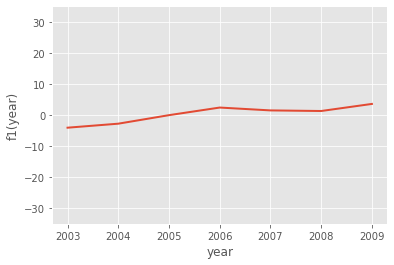

In [9]:
order = np.argsort(Wages.year.values)

plt.plot(Wages.year[order],f1[order], lw=2)
plt.ylim([-35,35]);
labels = list(range(2003,2010,1))
plt.xticks(range(2003,2010), labels);
plt.xlabel('year');
plt.ylabel('f1(year)');

In [10]:
age_basis = design[design.columns[9:]]

In [11]:
f2 = np.dot(age_basis.values, gam.params[9:])

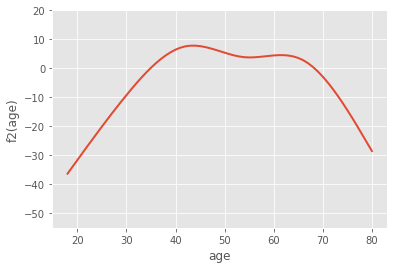

In [12]:
order = np.argsort(Wages.age.values)

plt.plot(Wages.age[order], f2[order], lw=2);
plt.ylabel('f2(age)');
plt.xlabel('age');
plt.ylim([-55,20]);

In [13]:
ed_levels = design[design.columns[1:5]]

In [14]:
ed_coeffs = gam.params[1:5];

Wages['ed_F3'] = np.dot(ed_levels, ed_coeffs)
Wages['ed_F3'] = Wages['ed_F3']-Wages['ed_F3'].mean()
Wages.head(2)

,id,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage,ed_F3
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154,-26.227696
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020,12.005255


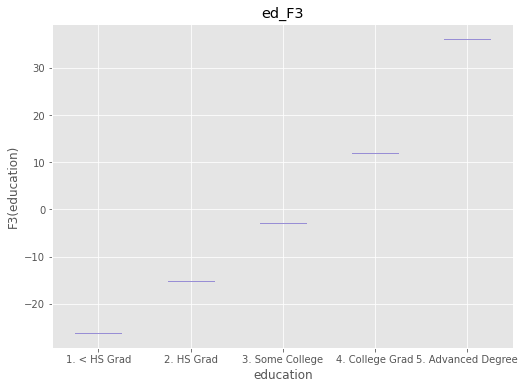

In [15]:
fig, ax1 = plt.subplots(1,1,figsize=(8,6))
Wages.boxplot(column='ed_F3', by='education', ax=ax1);
ax1.set_ylabel('F3(education)');
plt.suptitle('');

In [16]:
design1 = dmatrix("cr(age, df=5, constraints='center') + education",
                 data={"age":Wages.age, "education":Wages.education}, return_type="dataframe")

gam1 = sm.OLS(endog=Wages.wage, exog=design1).fit()

design2 = dmatrix("year + cr(age, df=5, constraints='center') + education",
                 data={"year":Wages.year, "age":Wages.age, "education":Wages.education}, return_type="dataframe")

gam2 = sm.OLS(endog=Wages.wage, exog=design2).fit()

design3 = dmatrix("cr(year, df=4, constraints='center') + cr(age, df=5, constraints='center') + education",
                 data={"year":Wages.year, "age":Wages.age, "education":Wages.education}, return_type="dataframe")

gam3 = sm.OLS(endog=Wages.wage, exog=design3).fit()

anova = sm.stats.anova_lm(gam1, gam2, gam3)
print(anova)

   df_resid           ssr  df_diff       ss_diff          F    Pr(>F)
0    2990.0  3.712549e+06      0.0           NaN        NaN       NaN
1    2989.0  3.695015e+06      1.0  17534.011180  14.182511  0.000169
2    2986.0  3.691628e+06      3.0   3386.677223   0.913113  0.433717


In [17]:
print(gam2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     123.5
Date:                Thu, 25 Aug 2022   Prob (F-statistic):          4.70e-216
Time:                        11:04:49   Log-Likelihood:                -14931.
No. Observations:                3000   AIC:                         2.988e+04
Df Residuals:                    2989   BIC:                         2.995e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------